# Grafana Export Data
Feature : CO,CO2,TVOC,PM Number   
Time : 2021-12-22 11:00:00 ~ 2022-01-12 10:30:00 (15min)

## 1. 데이터 로드 및 전처리

In [1]:
# 필요한 라이브러리 import

import pandas as pd
import numpy as np
import datetime
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False   # 한글 폰트 패치.

import warnings
warnings.filterwarnings('ignore')   # 경고문 처리.

In [2]:
# 데이터 로드
dir_path = 'C:/myPyCode/AI_DATA/Outlier Detection/'
file1 = 'CO, CO2 2022-01-12 10_50_41.csv'
file2 = 'PM Number 2022-01-12 10_52_02.csv'
file3 = 'TVOC 2022-01-12 10_51_31.csv'

df1 = pd.read_csv(dir_path + file1, encoding='utf-8')
df2 = pd.read_csv(dir_path + file2, encoding='utf-8')
df3 = pd.read_csv(dir_path + file3, encoding='utf-8')

In [3]:
print(df1.head(10))
df1.info()

                  Time      CO     CO2
0  2021-12-22 10:30:00     NaN     NaN
1  2021-12-22 11:00:00  3531.0  1045.0
2  2021-12-22 11:30:00     NaN     NaN
3  2021-12-22 12:00:00  3451.0  1146.0
4  2021-12-22 12:30:00  3262.0   831.0
5  2021-12-22 13:00:00  3300.0   633.0
6  2021-12-22 13:30:00  3744.0   727.0
7  2021-12-22 14:00:00  2895.0   766.0
8  2021-12-22 14:30:00  3278.0   904.0
9  2021-12-22 15:00:00  3585.0   892.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1009 non-null   object 
 1   CO      1000 non-null   float64
 2   CO2     1000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 23.8+ KB


In [4]:
print(df2.head(10))
df2.info()

                  Time  PM 0.5
0  2021-12-22 11:00:00   152.0
1  2021-12-22 12:00:00   139.0
2  2021-12-22 12:30:00    96.0
3  2021-12-22 13:00:00    92.0
4  2021-12-22 13:30:00    99.0
5  2021-12-22 14:00:00   101.0
6  2021-12-22 14:30:00   139.0
7  2021-12-22 15:00:00   162.0
8  2021-12-22 15:30:00   221.0
9  2021-12-22 16:00:00   239.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1000 non-null   object 
 1   PM 0.5  1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [5]:
print(df3.head(10))
df3.info()

                  Time  TVOC
0  2021-12-22 11:00:00   594
1  2021-12-22 12:00:00   629
2  2021-12-22 12:30:00   481
3  2021-12-22 13:00:00   465
4  2021-12-22 13:30:00   403
5  2021-12-22 14:00:00   414
6  2021-12-22 14:30:00   476
7  2021-12-22 15:00:00   415
8  2021-12-22 15:30:00   470
9  2021-12-22 16:00:00   403
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    1000 non-null   object
 1   TVOC    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


#### CO, CO2 데이터프레임에서 결측치를 발견하였고, 해당 행에 결측치 대치를 수행해야함.

In [6]:
print(df1[df1['CO'].isna()])

                    Time  CO  CO2
0    2021-12-22 10:30:00 NaN  NaN
2    2021-12-22 11:30:00 NaN  NaN
108  2021-12-24 16:30:00 NaN  NaN
812  2022-01-08 08:30:00 NaN  NaN
813  2022-01-08 09:00:00 NaN  NaN
814  2022-01-08 09:30:00 NaN  NaN
815  2022-01-08 10:00:00 NaN  NaN
816  2022-01-08 10:30:00 NaN  NaN
817  2022-01-08 11:00:00 NaN  NaN


In [7]:
# 데이터 전처리
df3['TVOC'] = df3['TVOC'].astype(float)
df1.fillna(method='bfill', inplace=True)
df = pd.merge(df1,df2, how='inner')
df = pd.merge(df,df3, how='inner')
df['Time'] = pd.to_datetime(df['Time'])
df

,Time,CO,CO2,PM 0.5,TVOC
0,2021-12-22 11:00:00,3531.0,1045.0,152.0,594.0
1,2021-12-22 12:00:00,3451.0,1146.0,139.0,629.0
2,2021-12-22 12:30:00,3262.0,831.0,96.0,481.0
3,2021-12-22 13:00:00,3300.0,633.0,92.0,465.0
4,2021-12-22 13:30:00,3744.0,727.0,99.0,403.0
...,...,...,...,...,...
995,2022-01-12 08:30:00,1989.0,400.0,75.0,0.0
996,2022-01-12 09:00:00,1492.0,400.0,72.0,21.0
997,2022-01-12 09:30:00,1851.0,400.0,224.0,99.0
998,2022-01-12 10:00:00,2194.0,400.0,418.0,238.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    1000 non-null   datetime64[ns]
 1   CO      1000 non-null   float64       
 2   CO2     1000 non-null   float64       
 3   PM 0.5  1000 non-null   float64       
 4   TVOC    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 46.9 KB


#### 최종 데이터셋

In [9]:
# 최종 데이터셋

df_data = df.iloc[:,1:]
df_date = df.iloc[:,0]

print(df_data.shape)
print(df_date.shape)
df

(1000, 4)
(1000,)


,Time,CO,CO2,PM 0.5,TVOC
0,2021-12-22 11:00:00,3531.0,1045.0,152.0,594.0
1,2021-12-22 12:00:00,3451.0,1146.0,139.0,629.0
2,2021-12-22 12:30:00,3262.0,831.0,96.0,481.0
3,2021-12-22 13:00:00,3300.0,633.0,92.0,465.0
4,2021-12-22 13:30:00,3744.0,727.0,99.0,403.0
...,...,...,...,...,...
995,2022-01-12 08:30:00,1989.0,400.0,75.0,0.0
996,2022-01-12 09:00:00,1492.0,400.0,72.0,21.0
997,2022-01-12 09:30:00,1851.0,400.0,224.0,99.0
998,2022-01-12 10:00:00,2194.0,400.0,418.0,238.0


## 2. 데이터 EDA

In [38]:
df.describe()

,CO,CO2,PM 0.5,TVOC
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2284.403000,653.997000,187.914000,483.112000
std,829.642689,367.959989,240.599026,531.593261
min,675.000000,400.000000,6.800000,0.000000
25%,1560.750000,400.000000,54.000000,182.000000
50%,2278.500000,545.000000,105.500000,339.500000
75%,2895.250000,737.500000,213.250000,561.250000
max,4485.000000,2821.000000,1619.000000,3190.000000


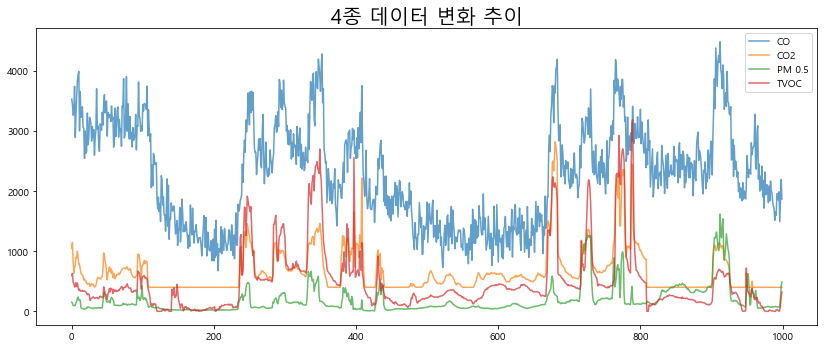

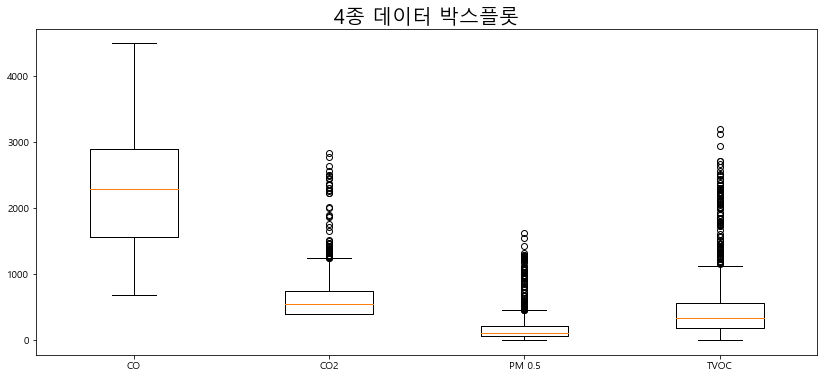

In [48]:
plt.figure(figsize=(14,12))

plt.subplot(2,1,1)
plt.plot(df_data, alpha=0.7)
plt.legend(df_data.columns.to_list())
plt.title('4종 데이터 변화 추이', size = 20)

plt.subplot(2,1,1)
plt.figure(figsize=(14,6))
plt.boxplot(df_data)
plt.xticks(np.arange(4)+1, df_data.columns.to_list())
plt.title('4종 데이터 박스플롯', size=20)

plt.show()

#### 데이터셋 표준화 적용

In [10]:
# 데이터 표준화 적용
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_data)
df_scaled = pd.DataFrame(df_scaled,columns=df_data.columns.to_list())
df_scaled

,CO,CO2,PM 0.5,TVOC
0,1.503323,1.063155,-0.149344,0.208700
1,1.406847,1.337779,-0.203403,0.274573
2,1.178925,0.481279,-0.382213,-0.003975
3,1.224750,-0.057092,-0.398846,-0.034088
4,1.760188,0.198499,-0.369738,-0.150777
...,...,...,...,...
995,-0.356239,-0.690630,-0.469538,-0.909255
996,-0.955591,-0.690630,-0.482014,-0.869731
997,-0.522659,-0.690630,0.150059,-0.722929
998,-0.109021,-0.690630,0.956783,-0.461320


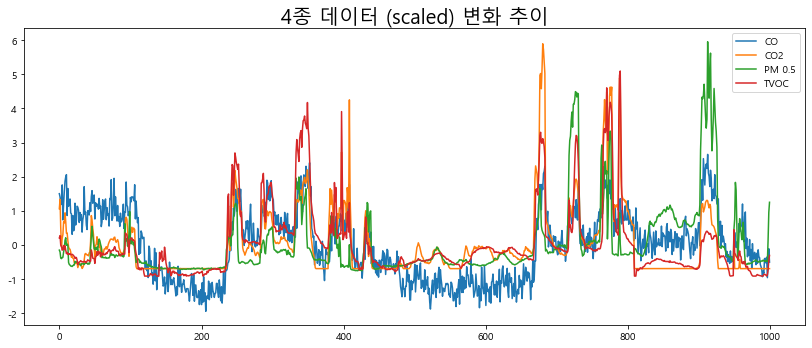

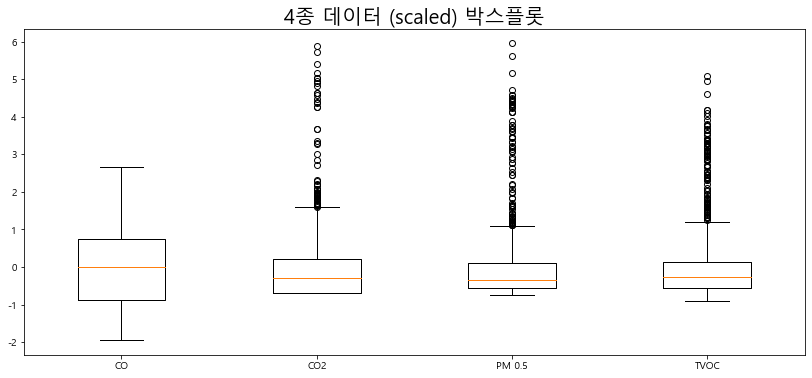

In [49]:
plt.figure(figsize=(14,12))

plt.subplot(2,1,1)
plt.plot(df_scaled)
plt.legend(df_data.columns.to_list())
plt.title('4종 데이터 (scaled) 변화 추이', size = 20)

plt.subplot(2,1,1)
plt.figure(figsize=(14,6))
plt.boxplot(df_scaled)
plt.xticks(np.arange(4)+1, df_data.columns.to_list())
plt.title('4종 데이터 (scaled) 박스플롯', size=20)

plt.show()

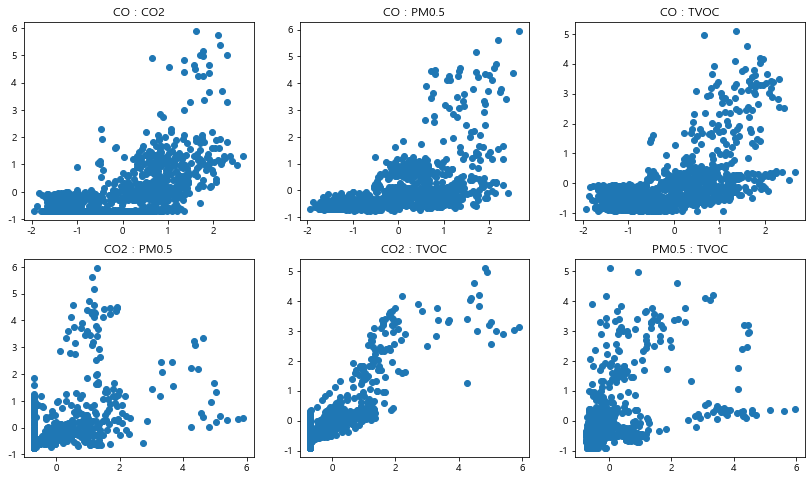

In [57]:
plt.figure(figsize=(14,8))

plt.subplot(2,3,1)
plt.scatter(df_scaled.iloc[:,0],df_scaled.iloc[:,1])
plt.title('CO : CO2')

plt.subplot(2,3,2)
plt.scatter(df_scaled.iloc[:,0],df_scaled.iloc[:,2])
plt.title('CO : PM0.5')

plt.subplot(2,3,3)
plt.scatter(df_scaled.iloc[:,0],df_scaled.iloc[:,3])
plt.title('CO : TVOC')

plt.subplot(2,3,4)
plt.scatter(df_scaled.iloc[:,1],df_scaled.iloc[:,2])
plt.title('CO2 : PM0.5')

plt.subplot(2,3,5)
plt.scatter(df_scaled.iloc[:,1],df_scaled.iloc[:,3])
plt.title('CO2 : TVOC')

plt.subplot(2,3,6)
plt.scatter(df_scaled.iloc[:,2],df_scaled.iloc[:,3])
plt.title('PM0.5 : TVOC')

plt.show()

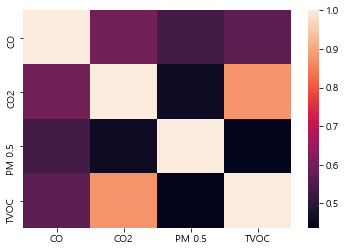

In [58]:
sns.heatmap(df_data.corr(), annot=True)
plt.show()

## 3. 이상치 탐지 모듈
### (1) IQR Method

In [14]:
def outlier_iqr(data, column):
    
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    iqr = q75 - q25
    cut_off = iqr*1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower] 
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')
    print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
    
    return data1, data2

In [60]:
upper_outlier, lower_outlier = outlier_iqr(df_data,'TVOC')

IQR은 379.25 이다.
lower bound 값은 -386.875 이다.
upper bound 값은 1130.125 이다.
총 이상치 개수는 100 이다.


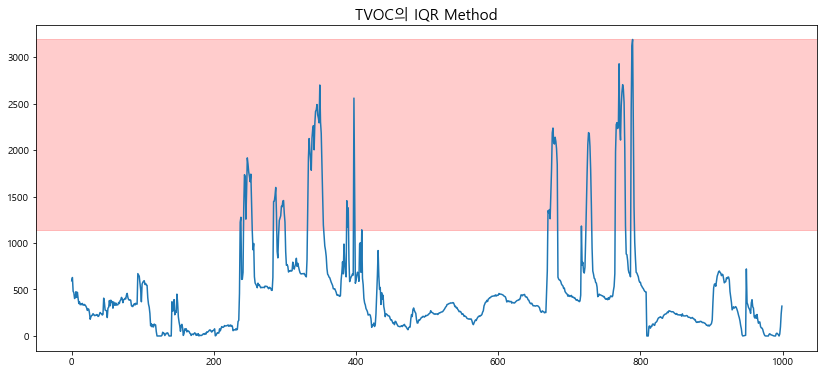

In [61]:
plt.figure(figsize=(14,6))
plt.plot(df_data.iloc[:,3])
plt.axhspan(ymin=upper_outlier.iloc[:,3].min(), ymax = df_data.iloc[:,3].max(), alpha=0.2, color='red')
plt.title('TVOC의 IQR Method', size=15)
plt.show()

표준화 적용 시

In [15]:
upper_outlier, lower_outlier = outlier_iqr(df_scaled,'TVOC')

IQR은 0.7137783628372676 이다.
lower bound 값은 -1.6373840383644191 이다.
upper bound 값은 1.2177294129846514 이다.
총 이상치 개수는 100 이다.


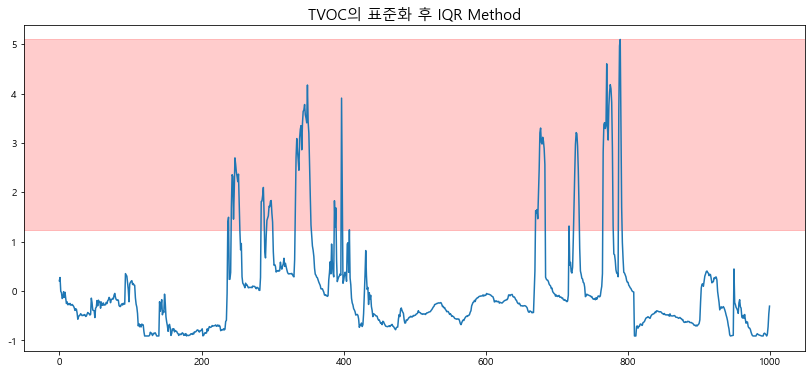

In [22]:
plt.figure(figsize=(14,6))
plt.plot(df_scaled.iloc[:,3])
plt.axhspan(ymin=upper_outlier.iloc[:,3].min(), ymax = df_scaled.iloc[:,3].max(), alpha=0.2, color='red')
plt.title('TVOC의 표준화 후 IQR Method', size=15)
plt.show()

### (2) Z-Score
데이터가 가우시안 분포를 따른다고 할 때, Outlier는 분포의 중심에서 멀어진 데이터이다.

In [24]:
def outlier_z_score(data, column):
    
    threshold=2.5
    mean = np.mean(data[column])
    std = np.std(data[column])
    z_score = [(y-mean)/std for y in data[column]]
    
    return np.where(np.abs(z_score) > threshold)

Outlier_data shape : (52, 4)


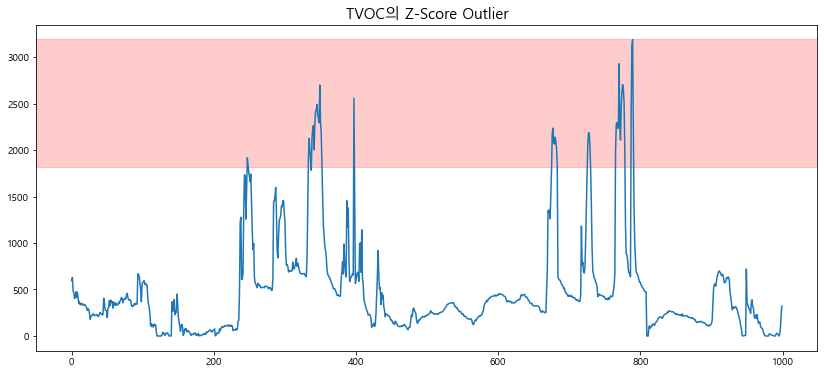

In [25]:
outlier_idx = outlier_z_score(df_data,'TVOC')
outlier_data = df_data.iloc[outlier_idx]
print('Outlier_data shape :',outlier_data.shape)

plt.figure(figsize=(14,6))
plt.plot(df_data.iloc[:,3])
plt.axhspan(ymin=df_data.iloc[outlier_idx].iloc[:,3].min(), ymax = df_data.iloc[:,3].max(), alpha=0.2, color='red')
plt.title('TVOC의 Z-Score Outlier', size=15)
plt.show()

표준화 적용시

Outlier_data shape : (52, 6)


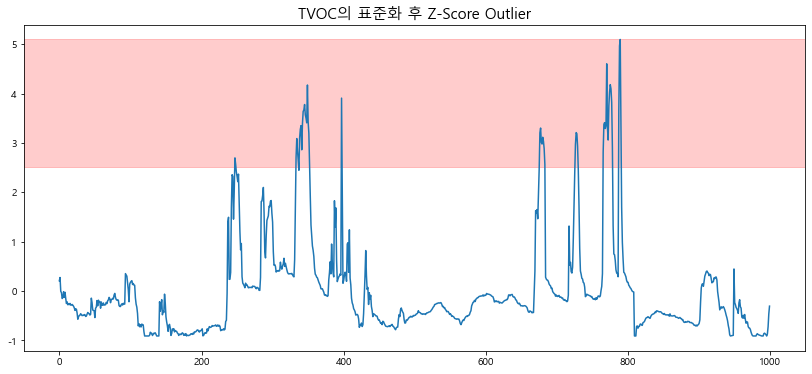

In [26]:
outlier_idx = outlier_z_score(df_scaled,'TVOC')
outlier_data = df_scaled.iloc[outlier_idx]
print('Outlier_data shape :',outlier_data.shape)

plt.figure(figsize=(14,6))
plt.plot(df_scaled.iloc[:,3])
plt.axhspan(ymin=df_scaled.iloc[outlier_idx].iloc[:,3].min(), ymax = df_scaled.iloc[:,3].max(), alpha=0.2, color='red')
plt.title('TVOC의 표준화 후 Z-Score Outlier', size=15)
plt.show()

### 3. Local Outlier Factor (LOF)
LOF는 비지도 이상치 탐지 기법 중 하나로 현재 가지고 있는 데이터 중 이상치를 탐지할 때 주로 사용되는 모델.   
개체의 LOF 점수는 가장 가까운 k개 점들의 Local Density의 평균과 자기 자신의 국소적 밀도의 비율로 정의   
정상값은 LD가 이웃들과 비슷한 반면, 이상치는 이웃에 비해 LD가 매우 낮기 때문에 큰 LOF 점수를 얻음.

In [68]:
from sklearn.neighbors import LocalOutlierFactor

lof_clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof_clf.fit_predict(df_data)
y_pred[:10]

array([ 1, -1,  1,  1, -1,  1,  1,  1, -1, -1])

In [69]:
df_data['bool'] = y_pred
df_data['score'] = lof_clf.negative_outlier_factor_

normal = df_data[df_data['bool'] == 1]
abnormal = df_data[df_data['bool'] != 1]

In [70]:
normal.head(4)

,CO,CO2,PM 0.5,TVOC,bool,score
0,3531.0,1045.0,152.0,594.0,1,-1.131234
2,3262.0,831.0,96.0,481.0,1,-1.043114
3,3300.0,633.0,92.0,465.0,1,-0.972081
5,2895.0,766.0,101.0,414.0,1,-1.006081


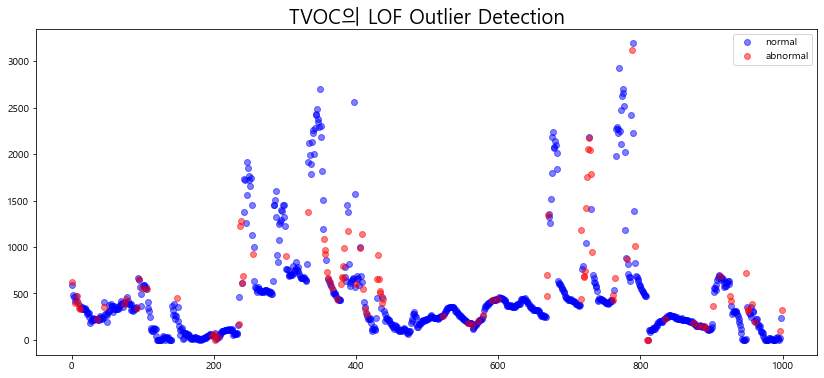

In [71]:
plt.figure(figsize=(14,6))
plt.scatter(normal.index,normal.iloc[:,3], c='b', alpha=0.5, label='normal')
plt.scatter(abnormal.index,abnormal.iloc[:,3], c='r', alpha=0.5, label='abnormal')
plt.legend()
plt.title('TVOC의 LOF Outlier Detection',size=20)
plt.show()

표준화 적용 후

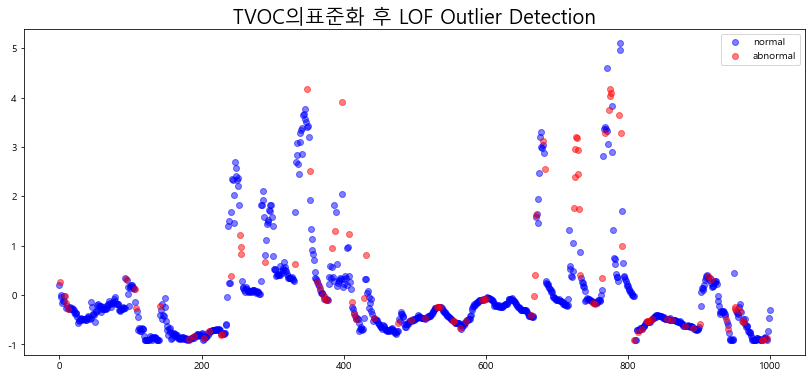

In [27]:
from sklearn.neighbors import LocalOutlierFactor

lof_clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof_clf.fit_predict(df_scaled)

df_scaled['bool'] = y_pred
df_scaled['score'] = lof_clf.negative_outlier_factor_

normal = df_scaled[df_scaled['bool'] == 1]
abnormal = df_scaled[df_scaled['bool'] != 1]

plt.figure(figsize=(14,6))
plt.scatter(normal.index,normal.iloc[:,3], c='b', alpha=0.5, label='normal')
plt.scatter(abnormal.index,abnormal.iloc[:,3], c='r', alpha=0.5, label='abnormal')
plt.legend()
plt.title('TVOC의표준화 후 LOF Outlier Detection',size=20)
plt.show()

### 4. Isolation Forest
IF는 앙상블 의사 결정 트리 기반 모델에 속하는 비지도 학습 알고리즘. 이상값들이 일반 지점에 비해 나머지 샘플에서 분리되는 경향에서 착안. 이상치는 눈에 띄게 짧은 경로를 생성함.    
- 1에 가까운 점수는 이상값을 나타낸다.
- 0.5보다 훨씬 작은 점수는 정상적인 관측값을 나타낸다.
- 모든 점수가 0.5에 가까우면 전체 샘플에서 명확하게 구별되는 이상이 없다고 판단한다.

In [72]:
from sklearn.ensemble import IsolationForest

isol = IsolationForest(max_samples=100, random_state=42)
isol.fit(df_data)
y_pred = isol.predict(df_data)
df_data['bool'] = y_pred

normal = df_data[ df_data['bool'] ==1 ]
abnormal = df_data[ df_data['bool'] !=1 ]

df_data.head()

,CO,CO2,PM 0.5,TVOC,bool,score
0,3531.0,1045.0,152.0,594.0,1,-1.131234
1,3451.0,1146.0,139.0,629.0,-1,-1.237483
2,3262.0,831.0,96.0,481.0,1,-1.043114
3,3300.0,633.0,92.0,465.0,1,-0.972081
4,3744.0,727.0,99.0,403.0,-1,-1.337436


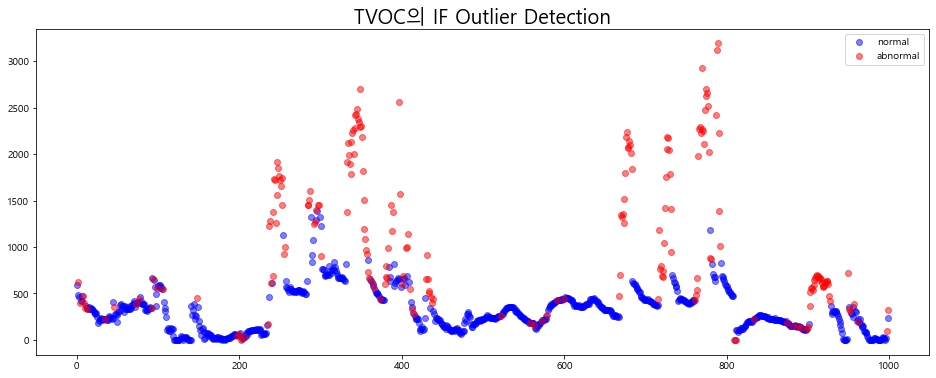

In [74]:
plt.figure(figsize=(16,6))
plt.scatter(normal.index,normal.iloc[:,3], c='b', alpha=0.5, label='normal')
plt.scatter(abnormal.index,abnormal.iloc[:,3], c='r', alpha=0.5, label='abnormal')
plt.legend()
plt.title('TVOC의 IF Outlier Detection',size=20)
plt.show()

표준화 적용 시

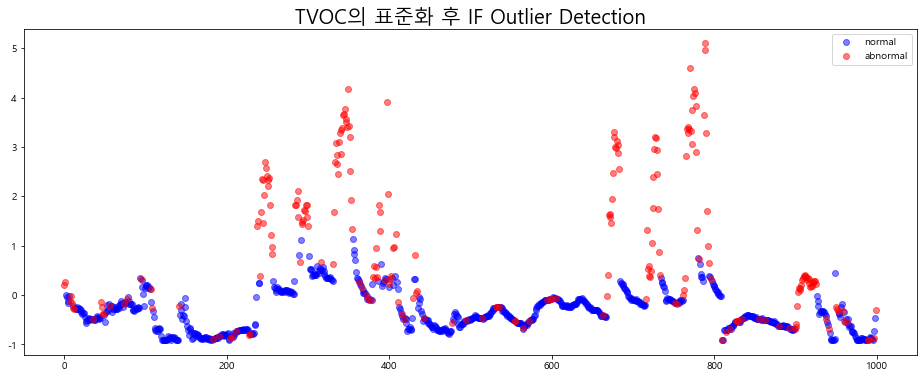

In [29]:
from sklearn.ensemble import IsolationForest

isol = IsolationForest(max_samples=100, random_state=42)
isol.fit(df_scaled)
y_pred = isol.predict(df_scaled)
df_scaled['bool'] = y_pred

normal = df_scaled[ df_scaled['bool'] ==1 ]
abnormal = df_scaled[ df_scaled['bool'] !=1 ]

plt.figure(figsize=(16,6))
plt.scatter(normal.index,normal.iloc[:,3], c='b', alpha=0.5, label='normal')
plt.scatter(abnormal.index,abnormal.iloc[:,3], c='r', alpha=0.5, label='abnormal')
plt.legend()
plt.title('TVOC의 표준화 후 IF Outlier Detection',size=20)
plt.show()

### (5) AutoEncoder : AE
- 오토인코더 기반의 이상 탐지란, 정상 데이터를 작은 차원의 잠재 공간(latent space)로 압축 후에 다시 복원하고, 복원된 데이터와 원본 데이터의 차이를 비교함으로써 이상 탐지를 수행하는 방법이다.   
- 여기서 인코더에 의해 데이터가 압축되어 나타나는 잠재 공간에서의 데이터 표현형을 잠재 변수(latent variable)이라고 한다.   
- AE는 원본 데이터와 복원된 데이터의 차이를 최소화하는 과정을 통해 학습하며, 그 과정에서 학습 데이터의 특징이 자연스럽게 추출되어 잠재 공간이 구성된다.   
- AE의 성능 및 특성을 비교하는 가장 기본적인 방식은 원본 데이터와 복원 데이터를 N차원 좌표 공간 안의 점들로 간주하고, 그 두 점의 거리를 입출력 차이의 지표로 사용하는 방식이다. 이 지표를 복원 오차(Reconstruction error)라고 한다.   
- 복원 오차는 주어진 데이터의 이상 정도를 나타내는 이상 점수(anomaly score)의 하나로 사용할 수 있으며, 이상 점수가 정해진 임계값(Threshold)보다 큰 경우에는 데이터를 이상으로 간주하며, 작은 경우에는 정상으로 간주한다.   
- 차원 축소를 통해 특징을 추출한다는 점에서 PCA와 유사하지만 AE는 데이터의 각 차원 사이의 비선형적 관계도 고려하여 이상 탐지를 수행할 수 있다는 장점이 있다.

In [ ]:
import tensorflow as tf
import seaborn as sns
from keras

In [12]:
df_scaled

,CO,CO2,PM 0.5,TVOC
0,1.503323,1.063155,-0.149344,0.208700
1,1.406847,1.337779,-0.203403,0.274573
2,1.178925,0.481279,-0.382213,-0.003975
3,1.224750,-0.057092,-0.398846,-0.034088
4,1.760188,0.198499,-0.369738,-0.150777
...,...,...,...,...
995,-0.356239,-0.690630,-0.469538,-0.909255
996,-0.955591,-0.690630,-0.482014,-0.869731
997,-0.522659,-0.690630,0.150059,-0.722929
998,-0.109021,-0.690630,0.956783,-0.461320
